In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pprint
import json
import random

In [61]:
with open('explanations.json') as fp:
    explanations = json.load(fp)

In [62]:
explanations

{'1042': {'top': 1,
  'data': "Student 1042\n\nPredicted likelihood to graduate: 0.624559194322715\n\nFactors: \nNo. of exams passed (2nd semester): 5\t0.10666965988808187\nNo. of exams passed (1st semester): 8\t0.09993702077504558\nTuition fees up to date: yes\t0.03372662727112627\nDebtor: no\t0.0282848703940493\nGDP at enrollment: -3.12\t0.026307058308491945\nUnemployment rate at enrollment: 9.4\t0.019829096446950436\nFather's qualification: Basic education 1st cycle (4th/5th year) or equivalent\t0.015493215138907244\nGender: female\t0.014869678098380197\nFather's occupation: Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry\t0.013107660817741786\nNo. of exams taken (2nd semester): 12\t-0.010770877791296951\nNo. of exams taken (1st semester): 8\t-0.013149350900430533\nNo. of classes taken (1st semester): 8\t-0.014604540144467963\nNo. of classes taken (2nd semester): 7\t-0.016168781435955216\nScholarship holder: no\t-0.016599751099333402\nNo. of classes credited from

# ChatGPT API

### Step 1: Set up & test connection

In [10]:
import openai
from openai import OpenAI

In [76]:
client = OpenAI(api_key = "")

In [13]:
response = client.chat.completions.create(
  model="gpt-3.5-turbo-1106",
  #response_format={ "type": "json_object" },
  messages=[
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": "Who won the world series in 2020?"}
  ]
)
print(response.choices[0].message.content)

The Los Angeles Dodgers won the World Series in 2020, defeating the Tampa Bay Rays.


### Step 2: Test prompt for explanation generation

In [40]:
system_message = """You are an AI tool that can support college advisors in their work. 
You have predicted if a given student is likely to graduate or to drop out.

Now, you explain why this this is the case. 
You explain why each individual factor would make it either easier or harder for the student to graduate. 
Focus on how these factors influence the student's life and possible academic hurdles.
Take all of the factors known about the student into account. Do not leave out any of the factors listed.

The explanation should be 3-8 paragraphs. Use clear and precise language. 
Do not use overly technical language or and do not include exact numbers. 
Do not make vague statements, do not use conditionals or qualifiers, and do not make disclaimers that you are unsure. 
Do not say that something positively/negatively influences the prediction. Instead, explain how it impacts the student's situation,
and why that is good or bad.
Do not summarize the explanation at the end."""

In [21]:
def make_user_message(x_text):

    start = "Please explain the decision for this student:\n\n"
    message = start + x_text
    return(message)

In [63]:
test = make_user_message(explanations["3224"]["data"])
print(test)

Please explain the decision for this student:

Student 3224

Predicted likelihood to graduate: 0.5529624236800422

Factors: 
No. of classes taken (2nd semester): 5	0.06097763415926528
Tuition fees up to date: yes	0.032441347324939356
No. of classes taken (1st semester): 5	0.03219926430180688
Debtor: no	0.028830732019010954
Course: Management	0.024771380295418657
Avg. grade (2nd semester): 12.25	0.023411022715311477
Previous qualification: Other-11th year of schooling	0.01966012554294301
Gender: female	0.01741098508305305
Father's qualification: Basic education 1st cycle (4th/5th year) or equivalent	0.01521134665012909
No. of exams passed (2nd semester): 4	-0.017595547218315535
Scholarship holder: no	-0.021633161968886174
GDP at enrollment: 1.74	-0.02238444311159868
Application mode: Over 23 years old	-0.041691074291544436
Age at enrollment: 31	-0.06685508936914988
No. of exams passed (1st semester): 1	-0.18098878664166645


In [46]:
user_example = """Please explain the decision for this student:

Student 3920

Predicted likelihood to graduate: 0.941308753928671

Factors:
Application mode : 1st phase—general contingent 0.027401924016171694
Mother's occupation : Unskilled Workers 	0.023602898137715787
Father's occupation : Personal Services, Security and Safety Workers, and Sellers 	0.016743372419589207
Debtor : no 	0.022149539370105255
Tuition fees up to date : yes 	0.06410017875932895
Gender : female 	+ 0.020552899171509903
Scholarship holder : yes 	0.10581657561033529
Age at enrollment : 19 		0.049006793304430814
Inflation rate at enrollment : -0.8 	0.015383342875219834
University's position in preferences when applying : 5 		-0.012381852446262007
Father's qualification : Secondary Education—12th Year of Schooling or Equivalent 	-0.010337802982001243"""

assistant_example = """Student 3920 demonstrates a high predicted likelihood of graduating, with several influential factors 
contributing to this positive outlook. Notably, the choice of the 1st phase in the general contingent during the application mode 
is a positive factor, indicative of a proactive approach towards enrollment. Additionally, the mother's occupation as 
"Unskilled Workers" and the father's occupation falling under "Personal Services, Security and Safety Workers, and Sellers" 
further contribute positively, suggesting a potentially supportive family environment.

The absence of debt and up-to-date tuition fee payments are notable positive factors, emphasizing financial stability and commitment 
to education. Other positive contributors include being a female, holding a scholarship, enrolling at the age of 19, and facing a 
relatively lower inflation rate at the time of enrollment.

On the negative side, the university's position in preferences during the application is a slightly detrimental factor, suggesting 
that the student may not have prioritized this particular university as their first choice. The father's qualification being at 
the "Secondary Education—12th Year of Schooling or Equivalent" level is another negative factor, though the impact is relatively smaller."""

In [53]:
response = client.chat.completions.create(
  model="gpt-3.5-turbo-1106",
  messages=[
    {"role": "system", "content": system_message},
    {"role": "user", "content": user_example},
    {"role": "assistant", "content": assistant_example},
    {"role": "user", "content": test}
  ]
)
print(response.choices[0].message.content)

Student 3224 is predicted to have a moderate likelihood of graduating. Several factors play into this prediction. On the positive side, the student has successfully paid their tuition fees, demonstrating financial stability and commitment. Additionally, the student has taken a substantial number of classes in both the 1st and 2nd semesters, showcasing an active engagement in their academic pursuits. The course of study in Management and a relatively high average grade in the 2nd semester further support the student’s academic progress.

However, there are several notable negative factors impacting the prediction. The student’s age at enrollment, which is 31, coupled with their application mode being categorized as “Over 23 years old,” suggests a non-traditional student status, which often comes with its own set of challenges. Furthermore, the student has passed a significantly lower number of exams in the 1st semester, reflecting potential academic difficulties. Not holding a scholarsh

In [54]:
response = client.chat.completions.create(
  model="gpt-4",
  messages=[
    {"role": "system", "content": system_message},
    {"role": "user", "content": user_example},
    {"role": "assistant", "content": assistant_example},
    {"role": "user", "content": test}
  ]
)
print(response.choices[0].message.content)

The predicted likelihood for Student 3224 to graduate is intermediate, with various factors shaping this outlook. Their academic performance and engagement, reflected in the number of classes taken in the 1st and 2nd semester, boost their chances of graduation. Achieving a relatively above-average grade of 12.25 in the second semester further confirms this positive trend.

The student's financial stability is assuring, illustrated by both their up-to-date tuition fees and absence of debt, which can reduce potential stresses and disruptions in their academic journey. Furthermore, their choice to pursue Management as a course of study and their previous qualification (Other-11th year of schooling) adds to their readiness for academic success.

On the other hand, there are some factors which account for the tempered prediction of graduation. Notably, the lower number of exams passed in the first and second semesters indicates potential academic challenges. Their age at enrollment (31) and

Looks like GPT-4 works much besser, so we will use this one!

### Generate lots of explanations

In [64]:
len(explanations.keys())

37

In [66]:
# we can probably pay for 37 prompts in one go, so lets just do all of them.

for key in explanations:

    print(key)

    data = explanations[key]["data"]
    user_message = make_user_message(data)

    response = client.chat.completions.create(
      model="gpt-4",
      messages=[
        {"role": "system", "content": system_message},
        {"role": "user", "content": user_example},
        {"role": "assistant", "content": assistant_example},
        {"role": "user", "content": user_message}
      ]
    )
    answer = response.choices[0].message.content
    explanations[key]["text"] = answer

1042
3988
3576
872
3207
2692
3027
2609
1833
3224
1125
3709
2980
262
1409
1050
2309
2642
629
2870
4421
503
2358
487
3647
3245
3151
223
758
68
66
3278
533
3369
3676
3588
4107


In [68]:
with open('explanations_lang.json', 'w') as fp:
    json.dump(explanations, fp)

In [69]:
explanations

{'1042': {'top': 1,
  'data': "Student 1042\n\nPredicted likelihood to graduate: 0.624559194322715\n\nFactors: \nNo. of exams passed (2nd semester): 5\t0.10666965988808187\nNo. of exams passed (1st semester): 8\t0.09993702077504558\nTuition fees up to date: yes\t0.03372662727112627\nDebtor: no\t0.0282848703940493\nGDP at enrollment: -3.12\t0.026307058308491945\nUnemployment rate at enrollment: 9.4\t0.019829096446950436\nFather's qualification: Basic education 1st cycle (4th/5th year) or equivalent\t0.015493215138907244\nGender: female\t0.014869678098380197\nFather's occupation: Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry\t0.013107660817741786\nNo. of exams taken (2nd semester): 12\t-0.010770877791296951\nNo. of exams taken (1st semester): 8\t-0.013149350900430533\nNo. of classes taken (1st semester): 8\t-0.014604540144467963\nNo. of classes taken (2nd semester): 7\t-0.016168781435955216\nScholarship holder: no\t-0.016599751099333402\nNo. of classes credited from

# Let's have a look

In [74]:
from IPython.display import Image
from IPython.display import display

The likelihood of graduation for Student 1042 has been determined by analyzing numerous factors. The passing of five exams in the second semester and eight in the first semester, for instance, identifies a discernable academic aptitude. This ability to handle and successfully pass multiple exams contributes to their higher likelihood to graduate.

Their financial stability, evidenced by up-to-date tuition fees, and being not a debtor, is another positive influence. It suggests they are less likely to face financial roadblocks that could hinder their studies. Under external economic conditions, despite a negative GDP at the time of enrollment, the unemployment rate has a more substantial influence which suggests the capacity to survive in a challenging job market after graduation.

While the father's qualification level and occupation might limit the overall familial support for the student's academic endeavors, the negative impact is counterbalanced by other factors such as the student

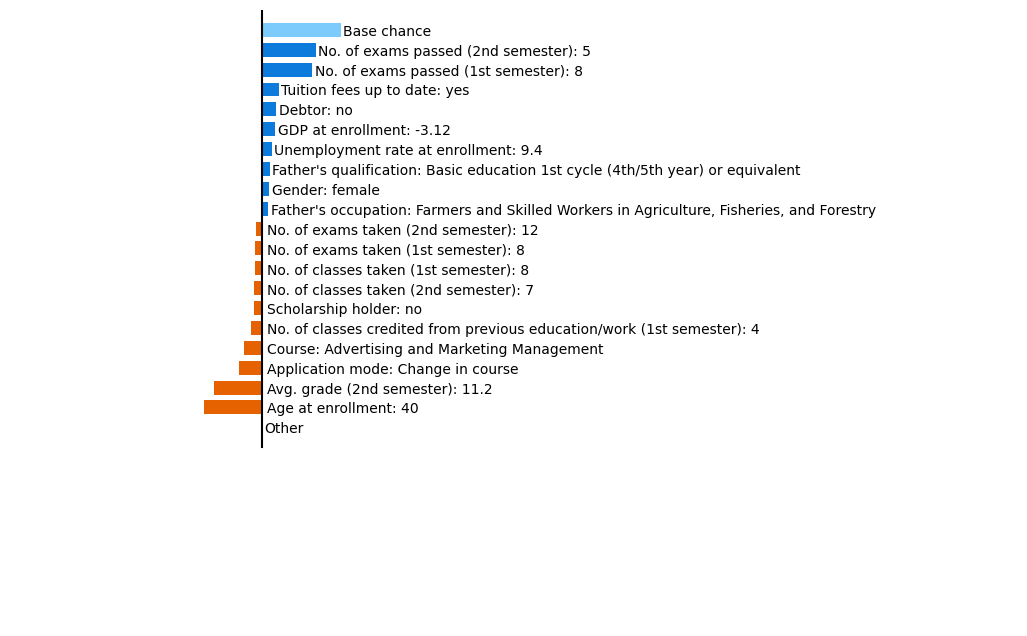

Student 3988 has a predicted high likelihood to graduate, supported by a number of key factors contributing to this prediction. The application through 1st phase general contingent indicates a strong initial commitment to the admission process. Timely payment of tuition fees and absence of debts hint towards a stable financial condition, which ensures freedom from financial strain associated with education.

The student holding a scholarship signifies that they have been academically successful in the past, potentially carrying this forward in their university studies. The fact that they have passed all five exams in their first semester is likely to boost their confidence and enhance their academic performance in subsequent semesters. The choice of course - Veterinary Nursing - too contributes positively to the prediction.

In addition to academics, other factors like age and economic indicators have their roles too. Enrollment at the age of 20 suggesting a focused mindset towards car

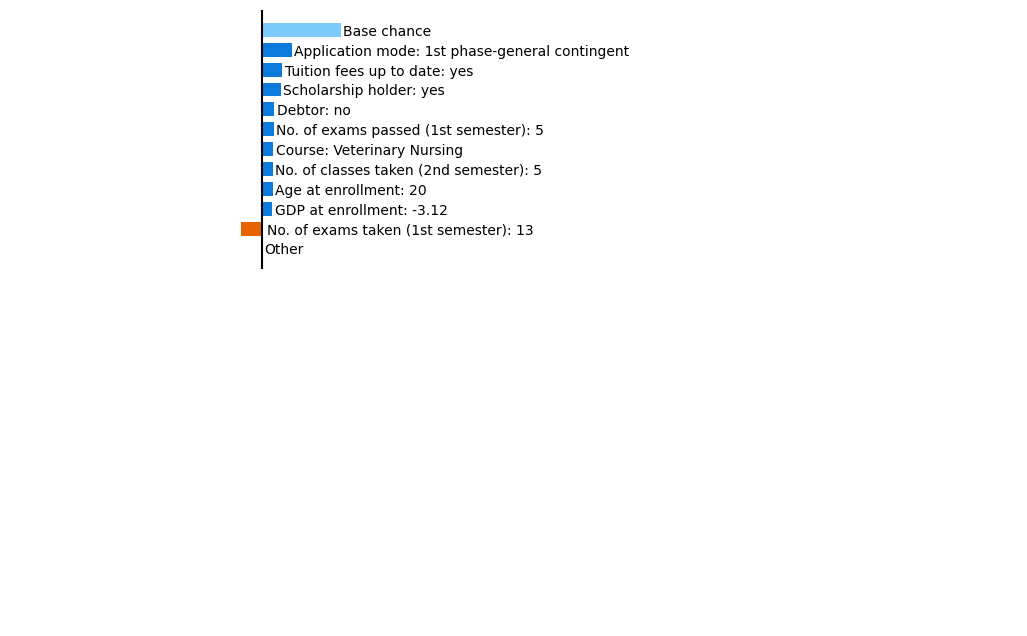

Student 3576 exhibits various factors contributing to a moderate likelihood of graduating. A positive stride is indicated in the fact that the student takes up five classes in the second semester. This combined with the student enrolling at the age of 19 years indicates commitment and a proactive approach towards academic achievement. 

Another strong positive is the student's financial stability illustrated by the up-to-date tuition fees and absence of debt. Moreover, the student's success in passing four exams in the second semester and striving to take seven exams in the first semester underline academic dedication which positively impacts the likelihood to graduate.

The selection of the Management course and five classes in the first semester also contribute moderately to the graduation likelihood. The mother's qualification being at the 'Secondary Education-12th Year of Schooling or Equivalent' level slightly aids the prediction by indicating a level of parental encouragement tow

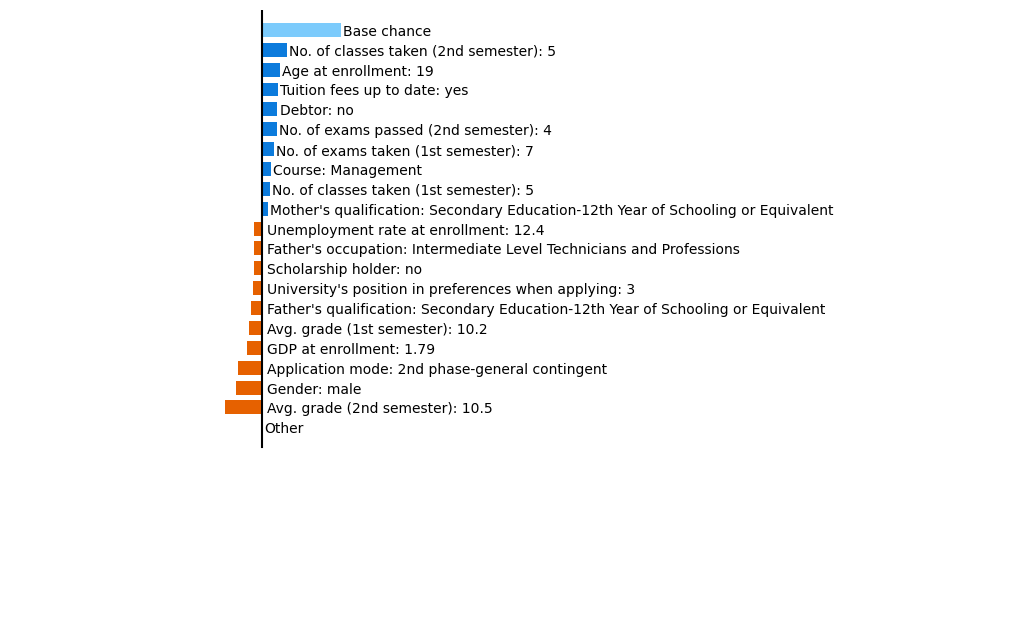

For Student 872, there are several factors playing into their lower likelihood of graduation. Exam performance in the initial semesters, including the successful completion of 10 exams in the 2nd semester and 13 in the 1st semester, provides strong support toward the student's academic prowess and determination. Non-financial status is also a beneficial factor highlighted by timely tuition fees and absence of debt, demonstrating the student's financial responsibility.

However, the evening attendance indicates that the student might be juggling commitments outside university. While this shows determination, it may also pose challenges in terms of time and energy allocation, leading to a potential strain on academic performance. 

In contrast to exams passed, the large number of exams taken in both semesters (15 in each semester) poses a concern. Coupled with an average grade of 11.58 in the 2nd semester, it suggests that the student might be facing academic challenges, with the potenti

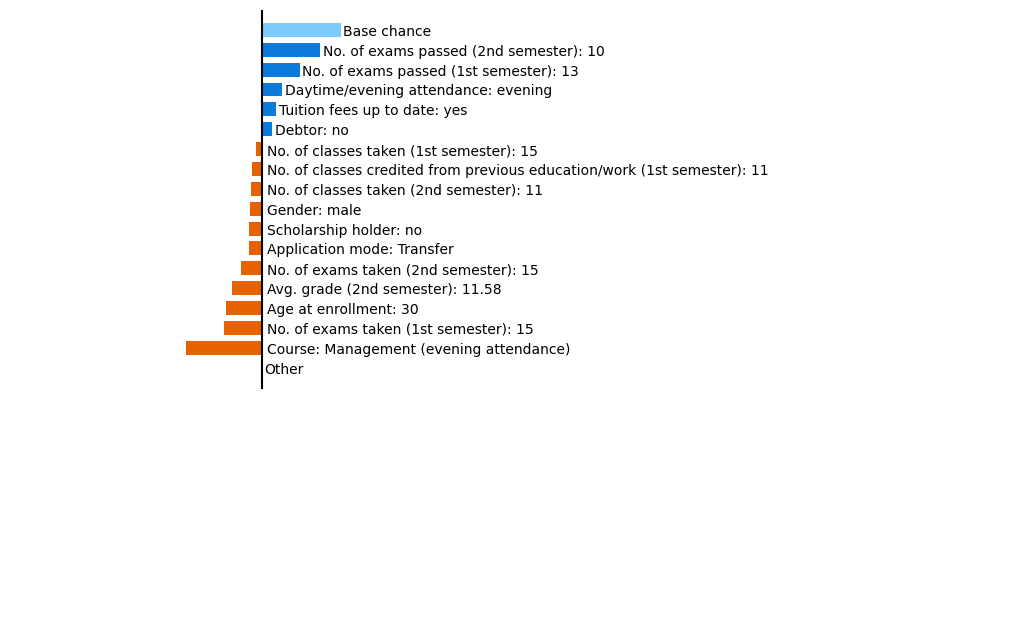

Student 3207 has a near-even probability of graduating, with several factors creating a challenging educational landscape that might pose hurdles to graduation. The field of study, Journalism and Communication, contributes to these challenges, perhaps due to sector-specific pressures or course difficulty. The status of the student as a debtor is another significantly negative factor, potentially leading to financial strain and added stress, which could negatively affect academic focus and commitment.

Similarly, other aspects contribute to this challenging picture, including the student's average grade of 11.57 in both semesters, which suggests academic struggles. Additionally, the student's male gender could potentially lead to societal or institutional biases that add to the difficulties faced. Likewise, enrolling at a time of high unemployment might have exposed the student to an uncertain economic environment, creating additional worry or distractions.

However, there is evidence o

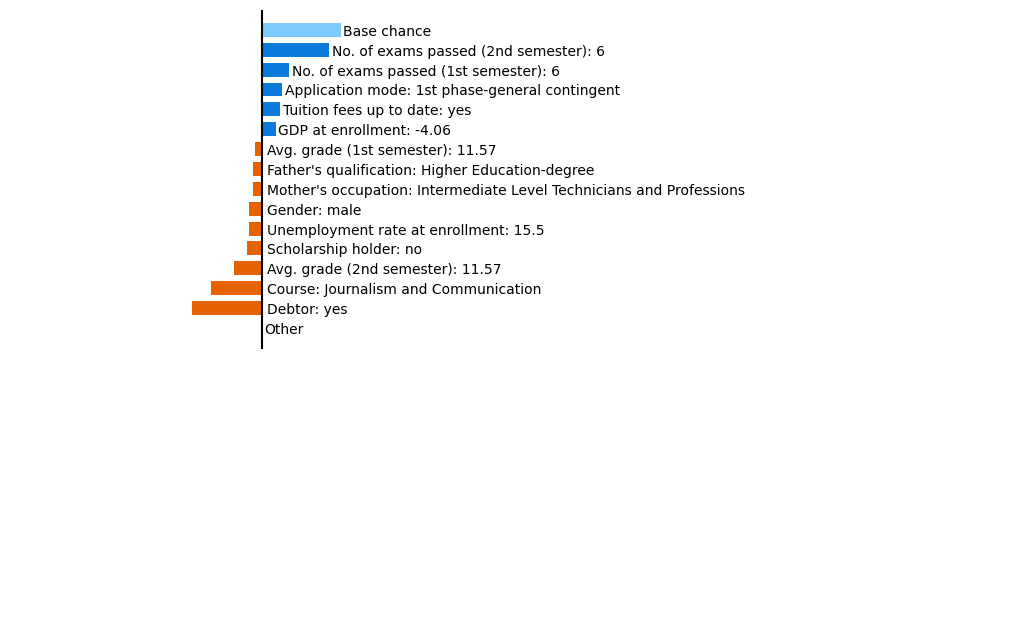

Student 2692's overall likelihood of graduation is solid, in part due to a few positive academic and financial indicators. The student succeeded in passing four exams in the second semester, suggesting a good grasp of the course material. Additionally, the student is taking a sufficient course load, as demonstrated by enrolling in five classes for two consecutive semesters. This suggests a willingness to manage a challenging workload and a commitment to progressing through their academic program methodically.

Moving forward, the student's continuity in education is confirmed by the absence of debt, timely tuition fee payments, and the attainment of scholarship. These signify both the financial readiness and the dedication of the student to pursue higher education. Their age at enrollment and the somewhat high unemployment rate at the time of enrollment further set the stage for more concentrated academic focus.

However, there are also considerable challenges facing this student. Desp

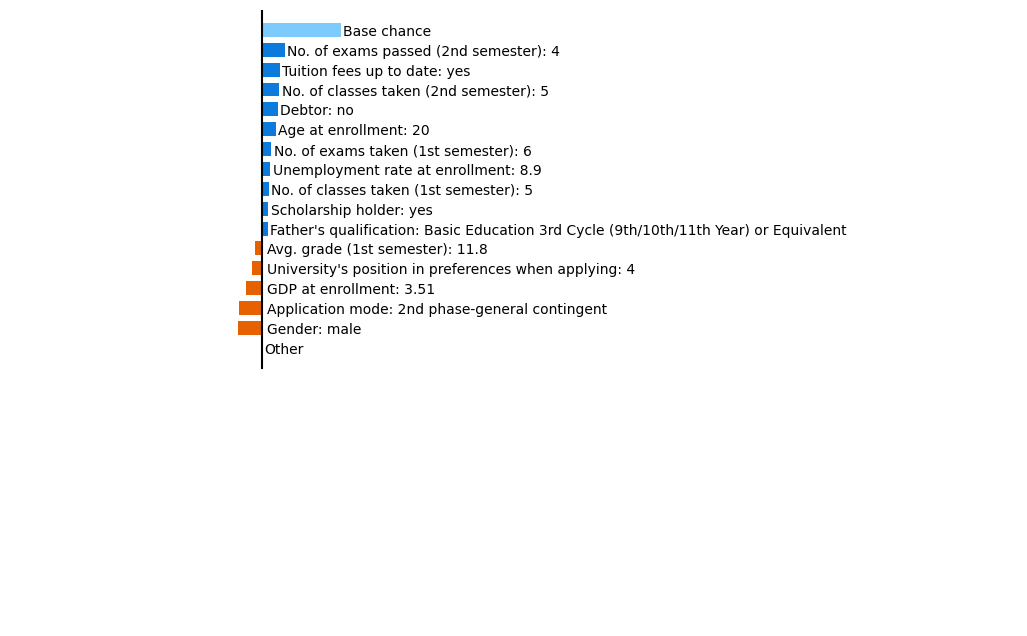

For Student 3027, the predicted likelihood of graduating is lower, with numerous negative factors posing significant challenges. Of the negative factors, the student's performance in terms of examinations stands out. The student has taken a large number of examinations in both the first and second semesters, but the number of passed exams is significantly lower. This implies potential struggles with academic workload and study habits, resulting in a lower graduation probability.

Being enrolled in the "Journalism and Communication" course also a significant negative effect. This might suggest the course being highly competitive or challenging for this student. The lack of scholarship contributes to an additional strain, placing an extra financial burden which might hinder focus on studies.

On the academic front, the student’s average grade in the second semester is relatively low, possibly suggesting difficulties in grasping course material or meeting academic standards. A high unempl

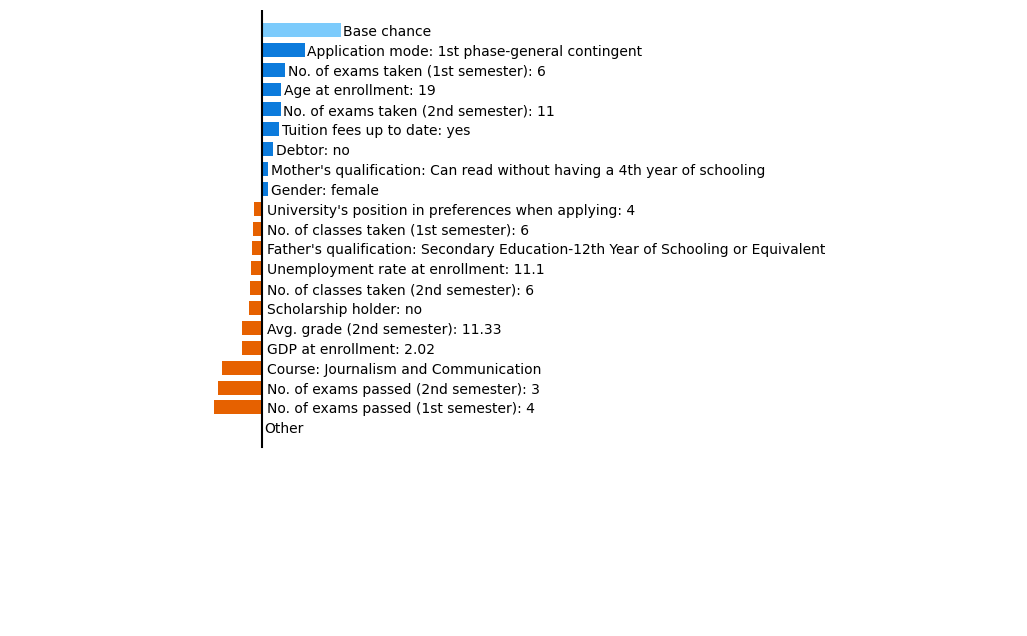

Student 2609 shows a low likelihood of graduating. An assortment of factors contribute to this outlook. Chief among these is the very low number of exams passed in both the first and second semesters. This indicates that the student is struggling academically, which can lead to their inability to progress and complete the course. 

An aggravating factor is the average grade in both the first and second semesters. A lower average grade not only reflects the student's academic performance but can also impact their motivation and confidence, making it more difficult for them to keep up with the course demands.

The student's enrollment age of 34 also plays a part in this predicted outcome. Older students may face additional challenges, balancing academic responsibilities with other life responsibilities like family or work, which could affect their ability to focus fully on their studies. The student's choice to attend evening classes, which is often a choice made to accommodate work, ser

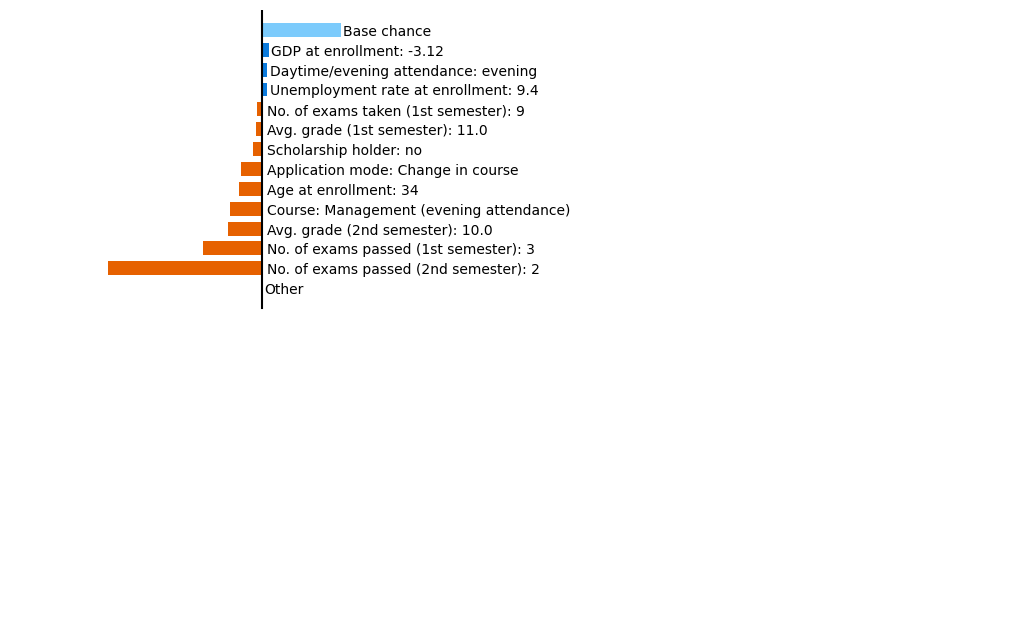

Student 1833 is less likely to graduate, with several significant factors warranting closer examination. While they have taken a complete course load of five classes in both the first and second semester, the number of exams passed in both semesters is a meager three. This proportion implies that despite initial signs of dedication towards academic engagement, this performance gap raises concerns about academic aptitude, understanding the course material, or investing the necessary time for study and preparation.

The student initially enrolled at the age of 19 and applied during the 1st phase—general contingent, which are generally positive factors. Being a scholarship holder, not having any debt, and being female also contribute positively to the student's profile, indicating resources and characteristics potentially supportive of academic success.

Yet, there are numerous significant challenges. Most importantly, their tuition fees are not up to date, signalling financial difficulty

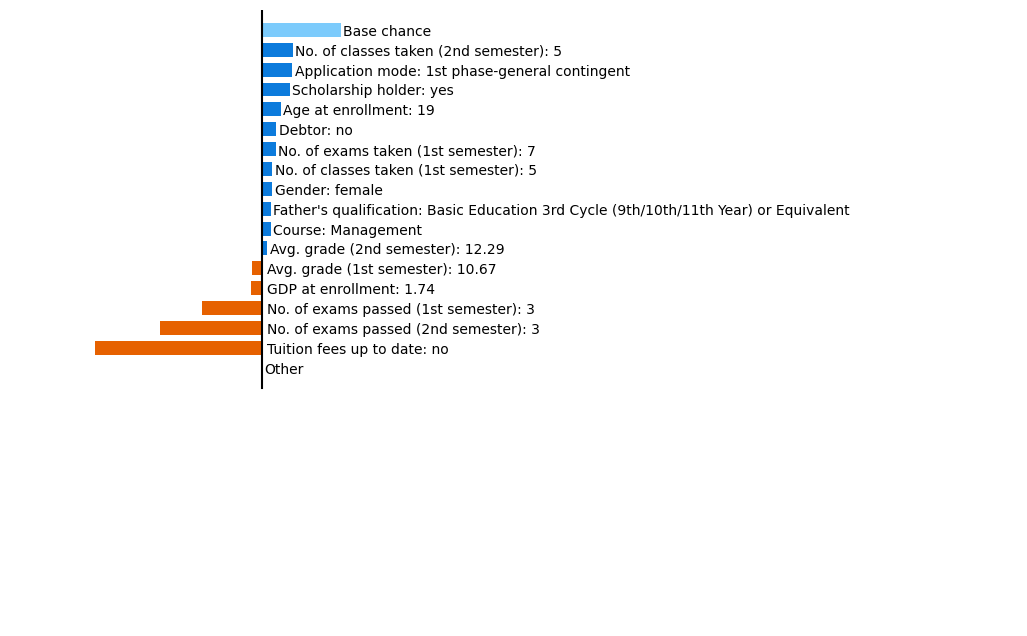

In [75]:
for student in explanations:
    if explanations[student]["top"] == 1:
        print(explanations[student]["text"])
        display(Image(filename='explanations_vis/'+student+'.png'))